In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 200)
pd.set_option('expand_frame_repr', True)
pd.set_option('max_colwidth',1000)

data
http://snap.stanford.edu/data/wiki-Vote.html

## Read entire datasets

In [2]:
import networkx as nx

In [3]:
path = '/Users/kimitakanakazawa/Desktop/data/wiki-Vote.txt'

In [4]:
wiki_full = nx.read_edgelist(path, nodetype=int, data=(('weight',int),),create_using=nx.DiGraph())

In [5]:
nx.is_directed(wiki_full)

True

In [6]:
len(wiki_full.nodes())

7115

In [7]:
print(nx.info(wiki_full))

Name: 
Type: DiGraph
Number of nodes: 7115
Number of edges: 103689
Average in degree:  14.5733
Average out degree:  14.5733


## Read partial data

In [8]:
edges_df = pd.read_csv(path,sep="\t",header=None, names=["from","to"],
                       skiprows=[0,1,2,3])

In [9]:
edges_df.head(10)

,from,to
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
5,3,28
6,3,30
7,3,39
8,3,54
9,3,108


## Directed 

In [10]:
wiki_small = nx.from_pandas_dataframe(edges_df[:300],source='from',
                                   target='to',edge_attr=True,create_using=nx.DiGraph())

# tw_small = nx.from_pandas_dataframe(edges_df[:300],source='from',
#                                    target='to',edge_attr=True)

In [11]:
wiki_small.is_directed()

True

In [12]:
print(nx.info(wiki_small))

Name: 
Type: DiGraph
Number of nodes: 177
Number of edges: 300
Average in degree:   1.6949
Average out degree:   1.6949


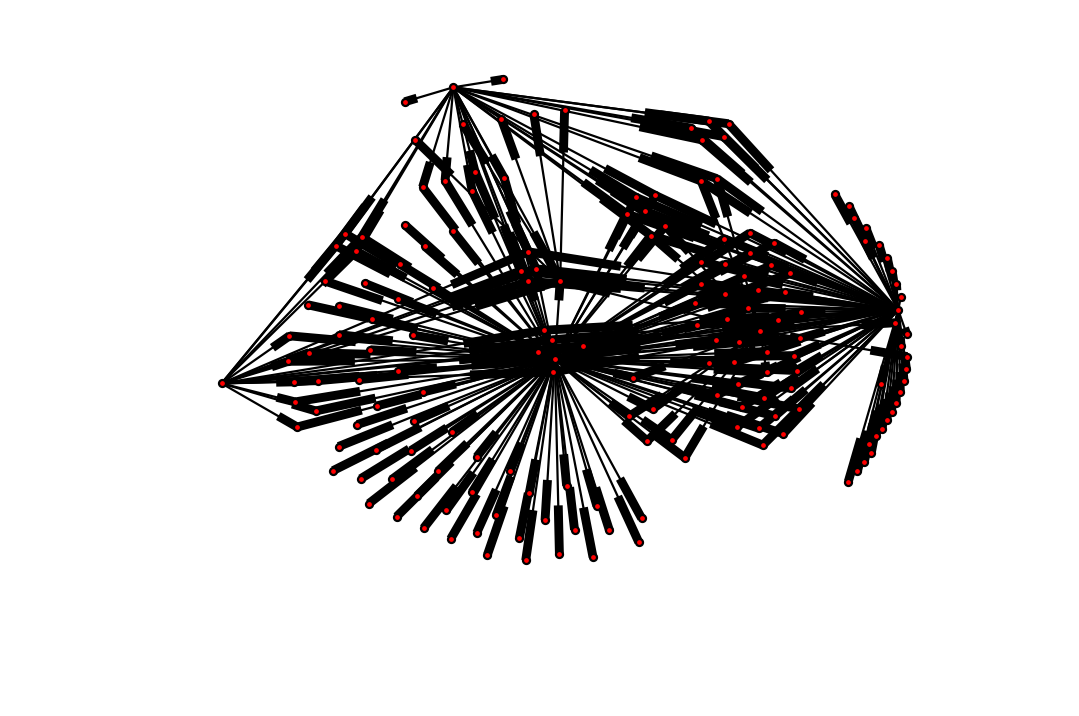

In [13]:
nx.draw(wiki_small,node_size=10)

In [14]:
centrality = nx.degree_centrality(wiki_small)

In [15]:
sorted(centrality.items(),key=lambda x:x[1],reverse=True)[:10]

[(6, 0.75),
 (25, 0.5113636363636364),
 (4, 0.16477272727272727),
 (3, 0.14204545454545456),
 (5, 0.13068181818181818),
 (30, 0.05681818181818182),
 (8, 0.022727272727272728),
 (28, 0.022727272727272728),
 (54, 0.022727272727272728),
 (611, 0.022727272727272728)]

In [16]:
nx.degree(wiki_small)[6]

132

In [17]:
for x in sorted(centrality.items(),key=lambda x:x[1],reverse=True)[:10]:
    tw88 = nx.from_pandas_dataframe(edges_df[(edges_df["from"] == x[0]) | (edges_df["to"] == x[0]) ],
                                source='from',target='to',edge_attr=True,create_using=nx.DiGraph())
    print("{}----------------------------------------------".format(x[0]))
    print(nx.info(tw88))

6----------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 315
Number of edges: 322
Average in degree:   1.0222
Average out degree:   1.0222
25----------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 91
Number of edges: 90
Average in degree:   0.9890
Average out degree:   0.9890
4----------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 30
Number of edges: 29
Average in degree:   0.9667
Average out degree:   0.9667
3----------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 52
Number of edges: 54
Average in degree:   1.0385
Average out degree:   1.0385
5----------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 24
Number of edges: 23
Average in degree:   0.9583
Average out degree:   0.9583
30----------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 29
Number of edges: 28
Average in degree:   0.9655
Average out degree:   0.9655


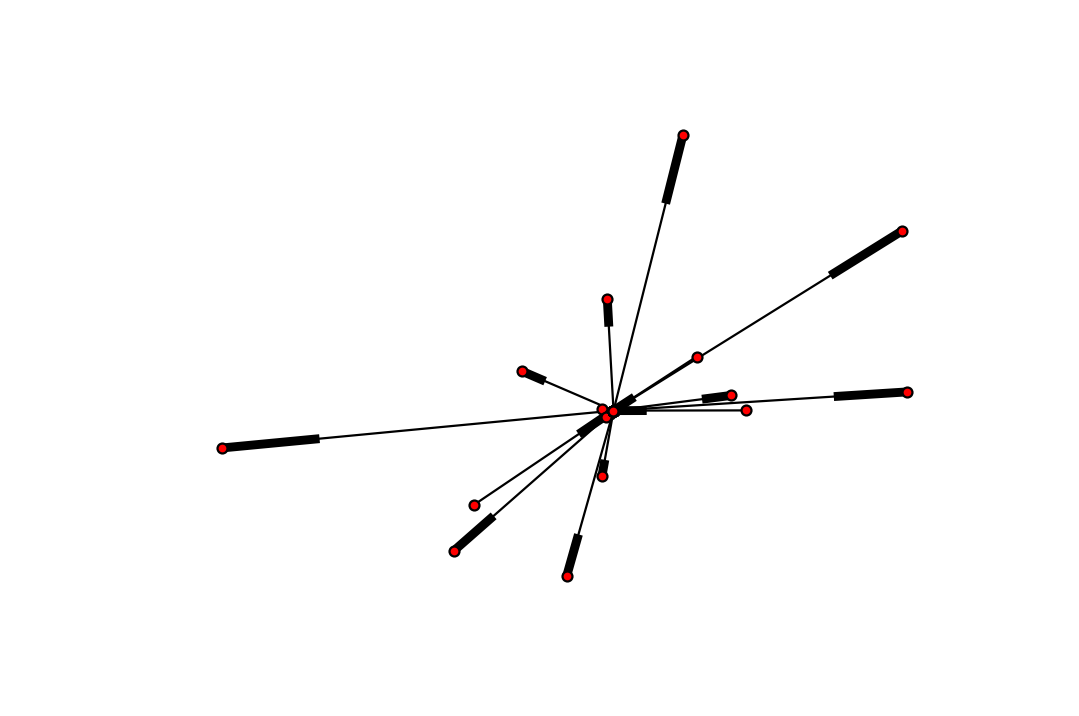

In [18]:
wiki_6 = nx.from_pandas_dataframe(edges_df[(edges_df["from"] == 6) | (edges_df["to"] == 6) ],
                                source='from',target='to',create_using=nx.DiGraph())
nx.draw(wiki_6,pos=nx.spectral_layout(wiki_6),node_size=20)

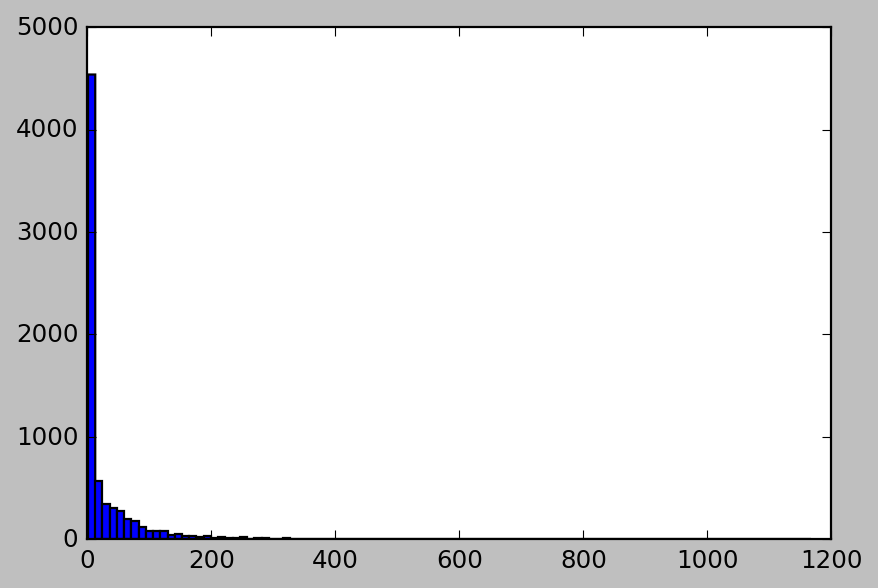

In [19]:
plt.hist(list(wiki_full.degree().values()),bins=100)
plt.show()

## Centralities

In [20]:
sorted(nx.closeness_centrality(wiki_full).items(),key=lambda x:x[1], 
       reverse=True)[:10]


[(766, 0.18720843320883898),
 (457, 0.1866059095978065),
 (2565, 0.18600863538076548),
 (11, 0.18500544110439568),
 (1166, 0.17593063365065395),
 (1549, 0.1743427385540616),
 (2688, 0.17376951906212734),
 (1151, 0.16936487708905126),
 (1374, 0.16793022142044142),
 (1133, 0.16527530539468888)]

In [21]:
from pprint import pprint

In [27]:
# degree
print("degree centrality", (sorted(nx.degree_centrality(wiki_full).items(),key=lambda x:x[1], 
       reverse=True)[:10]))

# clossness
print("clossness centrality",sorted(nx.closeness_centrality(wiki_full).items(),key=lambda x:x[1], 
       reverse=True)[:10])

# betweenness 
print("betweenness centrality",sorted(nx.betweenness_centrality(wiki_full).items(),key=lambda x:x[1], 
       reverse=True)[:10])

# eigenvector
print("eigenvector centrality",sorted(nx.eigenvector_centrality(wiki_full).items(),key=lambda x:x[1], 
       reverse=True)[:10])

degree centrality [(2565, 0.16404273263986505), (1549, 0.11695248805172898), (766, 0.10865898228844531), (11, 0.10444194545965702), (1166, 0.10444194545965702), (457, 0.10289569862243464), (2688, 0.08687095867303908), (1374, 0.07745290975541186), (1151, 0.07632836660106831), (5524, 0.0756255271296036)]
clossness centrality [(766, 0.18720843320883898), (457, 0.1866059095978065), (2565, 0.18600863538076548), (11, 0.18500544110439568), (1166, 0.17593063365065395), (1549, 0.1743427385540616), (2688, 0.17376951906212734), (1151, 0.16936487708905126), (1374, 0.16793022142044142), (1133, 0.16527530539468888)]
betweenness centrality [(2565, 0.017654409558147895), (1549, 0.016564095998753678), (15, 0.01156258726064681), (72, 0.008011822532712369), (737, 0.006134997021063533), (1166, 0.005802546834932393), (5079, 0.005438230580659517), (2328, 0.005202347375831287), (2237, 0.004714826895715732), (28, 0.004563992520641182)]
eigenvector centrality [(2398, 0.1171981483767996), (4037, 0.1089579006818

## Link prediction

### Jaccard Coefficient

In [30]:
wiki_full_undirect = wiki_full.to_undirected()
print(nx.info(wiki_full_undirect))

Name: 
Type: Graph
Number of nodes: 7115
Number of edges: 100762
Average degree:  28.3238


In [32]:
preds_jc = nx.jaccard_coefficient(wiki_full_undirect)

In [34]:
# takes a long time
pred_jc_dict = {}
for u, v, p in preds_jc:
    pred_jc_dict[(u,v)] = p

In [41]:
sorted(pred_jc_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[((2447, 2461), 1.0),
 ((1021, 7577), 1.0),
 ((7782, 7783), 1.0),
 ((6052, 6053), 1.0),
 ((2212, 2213), 1.0),
 ((2311, 6588), 1.0),
 ((6051, 6052), 1.0),
 ((7008, 7009), 1.0),
 ((4912, 4914), 1.0),
 ((210, 2864), 1.0)]

### Preferential Attachment

In [ ]:
preds_pa = nx.preferential_attachment(wiki_full_undirect)

In [ ]:
pred_pa_dict = {}
for u, v, p in preds_pa:
    pred_pa_dict[(u,v)] = p

In [ ]:
sorted(pred_pa_dict.items(), key=lambda x:x[1], reverse=True)[:10]